<a href="https://colab.research.google.com/github/muu86/ml_study/blob/main/2_%EC%84%A0%ED%98%95_%EB%AA%A8%EB%8D%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install mglearn

     |████████████████████████████████| 542kB 5.7MB/s 
  Created wheel for mglearn: filename=mglearn-0.1.9-py2.py3-none-any.whl size=582638 sha256=77b53601a3cbbb7dcaa5bca3cd4cbd3c6f899f525e04ca110c97c50600876877
  Stored in directory: /root/.cache/pip/wheels/eb/a6/ea/a6a3716233fa62fc561259b5cb1e28f79e9ff3592c0adac5f0
Successfully built mglearn


In [2]:
import mglearn
import numpy as np

w[0]: 0.393906  b: -0.031804


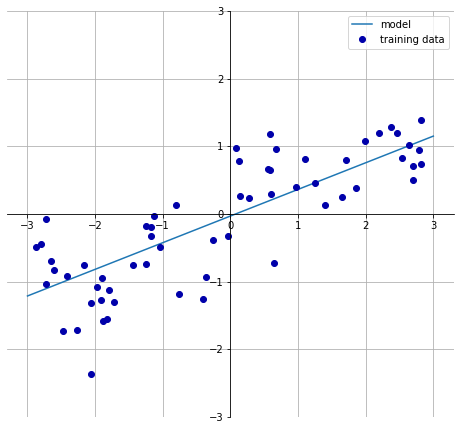

In [3]:
mglearn.plots.plot_linear_regression_wave()

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

X, y = mglearn.datasets.make_wave(n_samples=60)

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

lr = LinearRegression().fit(X_train, y_train)

In [5]:
X_train.shape, y_train.shape

((45, 1), (45,))

In [6]:
# 선형 회귀 모델이 학습한 가중치와 편향 보기
print("lr의 가중치(weight) : {}".format(lr.coef_))
print("lr의 편향(bias) : {}".format(lr.intercept_))

lr의 가중치(weight) : [0.39390555]
lr의 편향(bias) : -0.031804343026759746


In [7]:
# 훈련 세트와 테스트 세트 점수확인
print("훈련 세트 점수 : {:.2f}".format(lr.score(X_train, y_train)))
print("테스트 세트 점수 : {:.2f}".format(lr.score(X_test, y_test)))

훈련 세트 점수 : 0.67
테스트 세트 점수 : 0.66


데이터의 특성이 많다면 어떻게 될까요?

In [8]:
# 확장된 boston 주택가격 데이터셋 불러오기
X, y = mglearn.datasets.load_extended_boston()

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
lr = LinearRegression().fit(X_train, y_train)

print("훈련 세트 점수 : {:.2f}".format(lr.score(X_train, y_train)))
print("테스트 세트 점수 : {:.2f}".format(lr.score(X_test, y_test)))

훈련 세트 점수 : 0.95
테스트 세트 점수 : 0.61


In [9]:
X_train.shape

(379, 104)

# 가중치 패널티 ( $\alpha$ )

$\alpha$란 가중치를 억제하는 힘이라고 생각하면 편하다. 즉 $\alpha$가 커질 수록 가중치 $W$는 0에 가깝게 작아진다.

* Ridge 모델
 - $\alpha$가 커지면 가중치($W$)가 0에 가깝게 작아지지만, 실제 0이 되진 않습니다.
* Lasso 모델
 - $\alpha$가 커지면 가중치($W$)가 0에 가까워 지고, 실제 0이 되어버린다.
 - 이러한 특징을 **모델에 의한 특성 선택**이라고 한다.

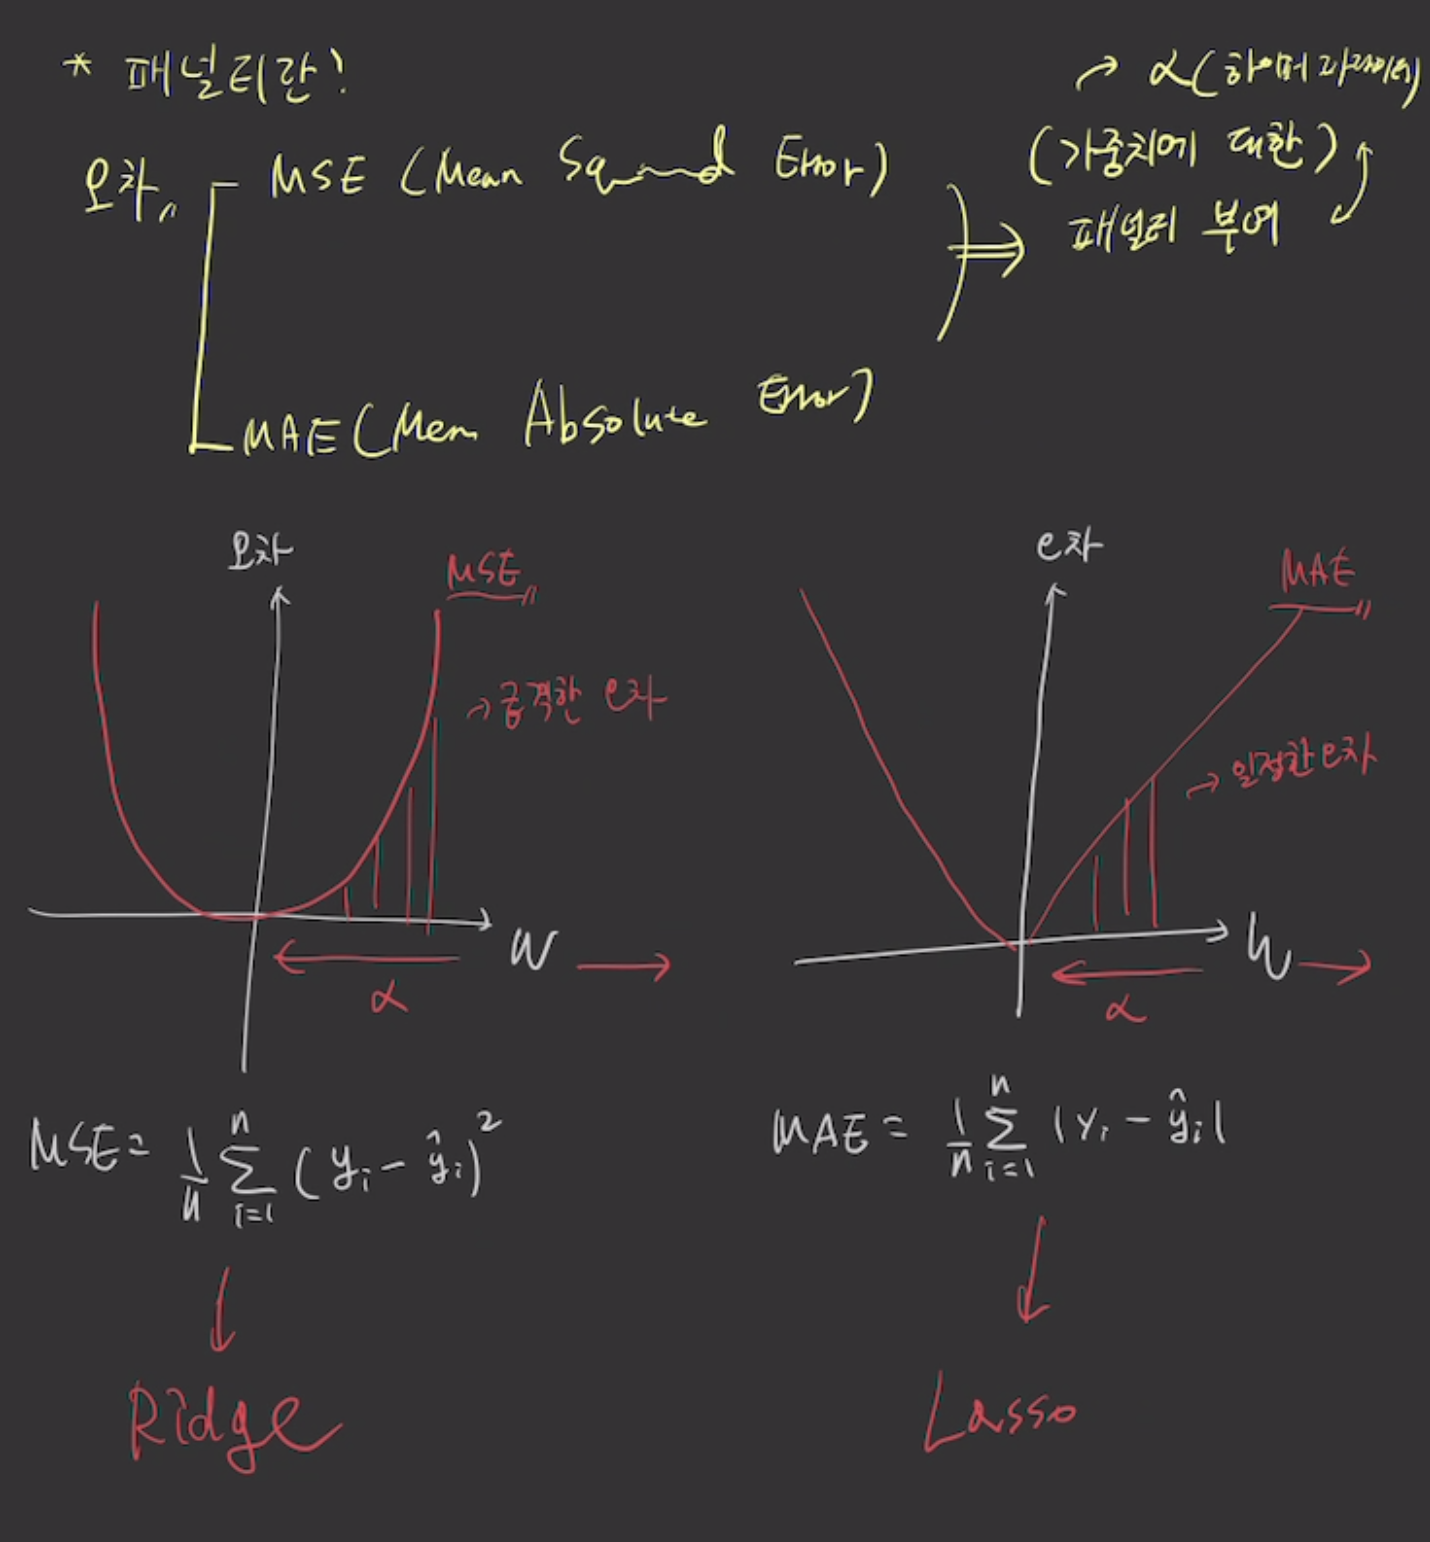

In [14]:
from sklearn.linear_model import Ridge

ridge = Ridge().fit(X_train, y_train)

print("훈련 세트의 점수 : {:.2f}".format(ridge.score(X_train, y_train)))
print("테스트 세트의 점수 : {:.2f}".format(ridge.score(X_test, y_test)))


훈련 세트의 점수 : 0.89
테스트 세트의 점수 : 0.75


In [15]:
ridge

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [17]:
# alpha 값에 따른 릿지 모델 성능 확인

ridge10 = Ridge(alpha=10).fit(X_train, y_train)
print("alpha = 10 일 때 훈련 세트의 점수 : {:.2f}".format(ridge10.score(X_train, y_train)))
print("alpha = 10 일 때 테스트 세트의 점수 : {:.2f}".format(ridge10.score(X_test, y_test)))

alpha = 10 일 때 훈련 세트의 점수 : 0.79
alpha = 10 일 때 테스트 세트의 점수 : 0.64


In [20]:
# alpha 를 0.1 로 설정한 경우
ridge01 = Ridge(alpha=0.1).fit(X_train, y_train)

print("alpha = 0.1 일 때 훈련 세트의 점수 : {:.2f}".format(ridge01.score(X_train, y_train)))
print("alpha = 0.1 일 때 테스트 세트의 점수 : {:.2f}".format(ridge01.score(X_test, y_test)))

alpha = 0.1 일 때 훈련 세트의 점수 : 0.93
alpha = 0.1 일 때 테스트 세트의 점수 : 0.77


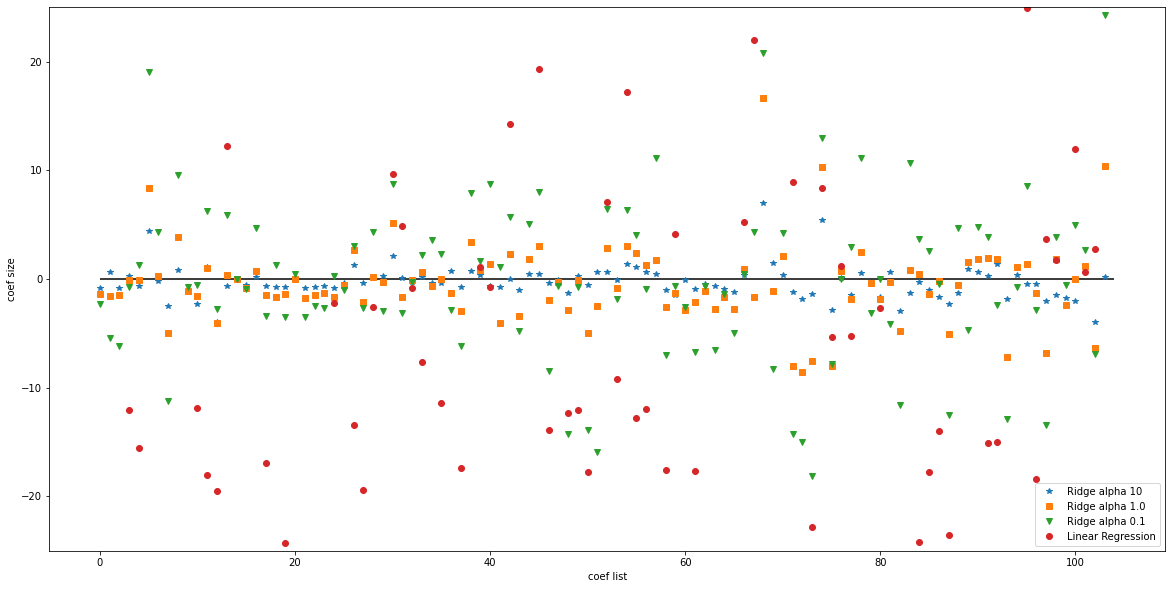

In [23]:
# alpha 값에 따른 각각의 특성에 대한 가중치의 분포도를 확인해보자
# 선형 모델의 coef_ 변수에 가중치 배열이 들어있다
import matplotlib.pyplot as plt


plt.figure(figsize=(20, 10))

plt.plot(ridge10.coef_, '*', label='Ridge alpha 10')
plt.plot(ridge.coef_, 's', label='Ridge alpha 1.0')
plt.plot(ridge01.coef_, 'v', label='Ridge alpha 0.1')
plt.plot(lr.coef_, 'o', label='Linear Regression')

plt.xlabel('coef list')
plt.ylabel('coef size')
plt.hlines(0, 0, len(lr.coef_))
plt.ylim(-25, 25)
plt.legend()

In [25]:
# Lasso

from sklearn.linear_model import Lasso

lasso = Lasso().fit(X_train, y_train)

print("훈련 세트의 점수 : {:.2f}".format(lasso.score(X_train, y_train)))
print("테스트 세트의 점수 : {:.2f}".format(lasso.score(X_test, y_test)))

훈련 세트의 점수 : 0.29
테스트 세트의 점수 : 0.21


In [26]:
lasso

Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [27]:
X_train.shape

(379, 104)

In [28]:
# 트레인 세트 104 차원인 것 확인

In [29]:
print('lasso 에서 선택한 특성의 개수 : {}'.format(np.sum(lasso.coef_ != 0)))

lasso 에서 선택한 특성의 개수 : 4


Ridge 는 가중치를 0에 가깝게 만드는 반면
Lasso 는 0으로 만들기 때문에
특성 104 개 중 4개만 0 이 아닌 것
과소적합

In [34]:
# Lasso 는 기본적으로 경사하강법을 이용해 오차를 수정한다. max_iter 는 Lasso 가 수행할 경사하강법의 최대 횟수이다.

lasso001 = Lasso(alpha=0.01, max_iter=1000000).fit(X_train, y_train)

print("훈련 세트의 점수 : {:.2f}".format(lasso001.score(X_train, y_train)))
print("테스트 세트의 점수 : {:.2f}".format(lasso001.score(X_test, y_test)))
print("lasso001 에서 선택한 특성의 개수 : {}".format(np.sum(lasso001.coef_ != 0)))

훈련 세트의 점수 : 0.90
테스트 세트의 점수 : 0.77
lasso001 에서 선택한 특성의 개수 : 33


In [39]:
lasso0001 = Lasso(alpha=0.0001, max_iter=1000000).fit(X_train, y_train)

print("훈련 세트의 점수 : {:.2f}".format(lasso0001.score(X_train, y_train)))
print("테스트 세트의 점수 : {:.2f}".format(lasso0001.score(X_test, y_test)))
print("lasso0001 에서 선택한 특성의 개수 : {}".format(np.sum(lasso0001.coef_ != 0)))

훈련 세트의 점수 : 0.95
테스트 세트의 점수 : 0.64
lasso0001 에서 선택한 특성의 개수 : 96


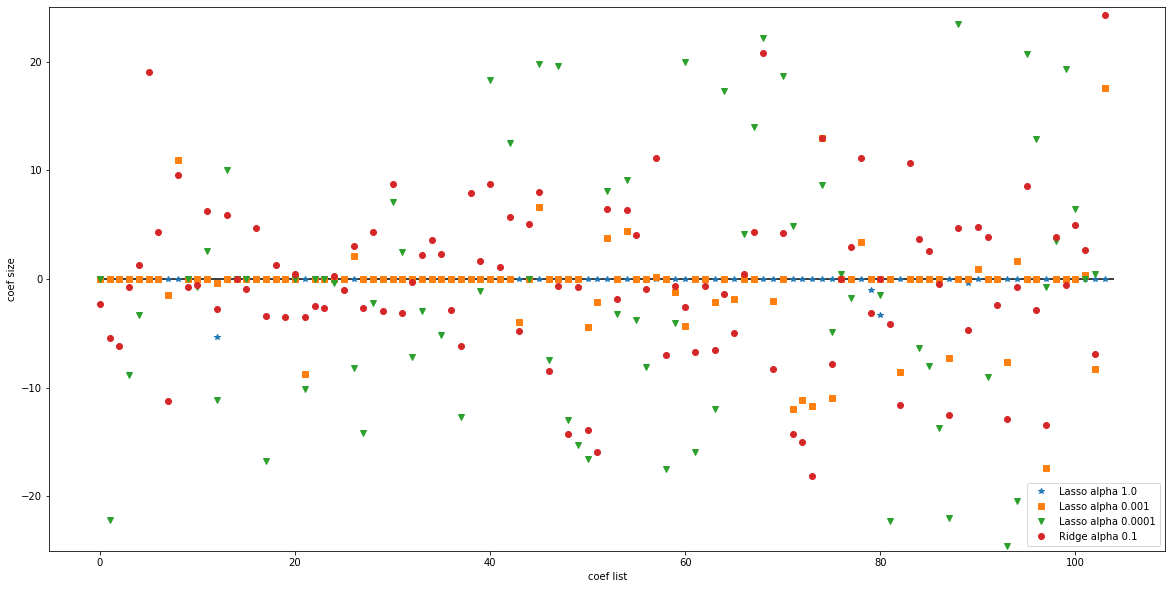

In [38]:
plt.figure(figsize=(20, 10))

plt.plot(lasso.coef_, '*', label='Lasso alpha 1.0')
plt.plot(lasso001.coef_, 's', label='Lasso alpha 0.001')
plt.plot(lasso0001.coef_, 'v', label='Lasso alpha 0.0001')
plt.plot(ridge01.coef_, 'o', label='Ridge alpha 0.1')

plt.xlabel('coef list')
plt.ylabel('coef size')
plt.hlines(0, 0, len(lr.coef_))
plt.ylim(-25, 25)
plt.legend()

## Linear Model Binary Classification

* 이진 분류기는 직선, 평면, 초평면을 활용해 클래스를 구분지어주는 분류기이다.
* 적절한 $w$와 $b$를 찾아서 그어주는 방법이 있고,  (딥러닝) - 손실함수(loss function) - LogisticRegression
* $w$와 $b$를 조절해가며 규제를 사용하는 방법이 있다. SVM( Support Vector Machine)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


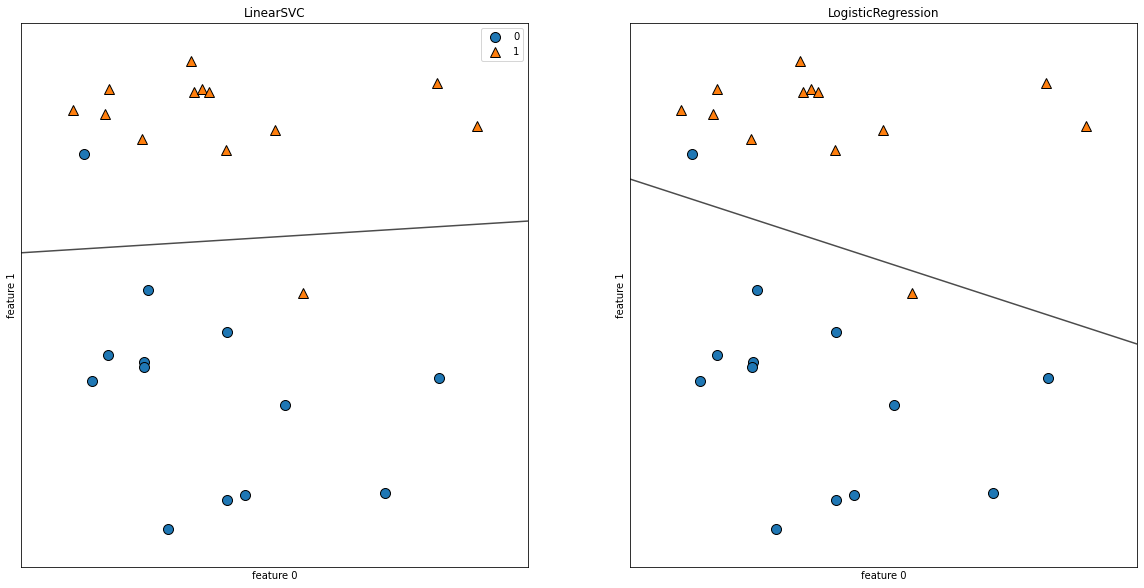

In [41]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
X, y = mglearn.datasets.make_forge()
fig, axes = plt.subplots(1, 2, figsize=(20, 10))
for model, ax in zip([LinearSVC(), LogisticRegression()], axes):
  clf = model.fit(X, y)
  mglearn.plots.plot_2d_separator(clf, X, fill=False, eps=0.5, ax=ax, alpha=.7)
  mglearn.discrete_scatter(X[:, 0], X[:, 1], y, ax=ax)
  ax.set_title("{}".format(clf.__class__.__name__))
  ax.set_xlabel("feature 0")
  ax.set_ylabel("feature 1")
axes[0].legend()
plt.show()

LinearSVC -> C 라는 규제 매개변수를 이용한다.( $\alpha$와 비슷하게 가중치를 조절할 수 있는 매개변수)

LogisticRegression : logistic( sigmoid ) 함수를 활용해서 loss가 최소화되는 방향으로 가중치와 편향을 조절하는 방식

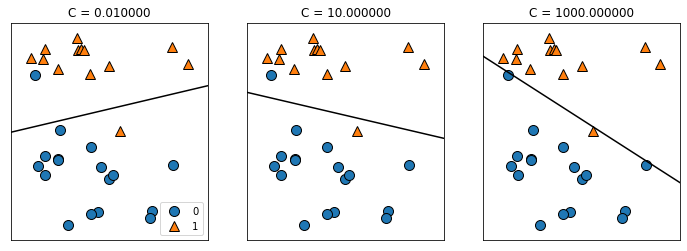

In [42]:
# svc 분류 그래프 확인하기
# 규제 매개변수 C 를 활용한다 -> alpha 의 반대개념
#   C 가 증가하면 규제가 감소하면서 가중치가 증가한다.
#   C 가 감소하면       증가               감소

mglearn.plots.plot_linear_svc_regularization()

C 가 낮아지면 가중치가 감소 -> 모델 단순 (복잡도 내려간다) -> 데이터의 패턴만을 분석하기 시작

C 가 높아지면 가중치 증가 -> 모델 복잡 -> 데이터 포인트 각각을 신경쓰기 시작한다

In [51]:
def print_score(model, X, y):
  X_train, X_test = X
  y_train, y_test = y
  
  print("훈련 세트의 점수 : {:.2f}".format(model.score(X_train, y_train)))
  print("테스트 세트의 점수 : {:.2f}".format(model.score(X_test, y_test)))

In [53]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()

X_train, X_test, y_train, y_test = train_test_split(cancer.data,
                                                   cancer.target,
                                                   stratify=cancer.target,
                                                   random_state=42)

logreg = LogisticRegression(max_iter=10000).fit(X_train, y_train)

print_score(logreg, X=(X_train, X_test), y=(y_train, y_test))

훈련 세트의 점수 : 0.96
테스트 세트의 점수 : 0.96


In [54]:
# logreg 는 과소적합일 수도 있을 것 같다.
# 복잡도를 증가시켜보자
# C 값을 증가

logreg100 = LogisticRegression(C=100).fit(X_train, y_train)
print_score(logreg100, X=(X_train, X_test), y=(y_train, y_test))

훈련 세트의 점수 : 0.95
테스트 세트의 점수 : 0.97


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


## Linear Model Multiple Classification

* 이진 분류 : 0 아니면 1
* 다중 분류 : 0, 1, 2, ...

문제는 기본적인 머신 러닝 모델들은 binary classification 만 지원하고,
multiple classification 은 지원하지 않는다.

0, 1, 2 세 종류의 클래스가 있다고 가정하면, 0과 1 비교, 1과 2 비교, 2와 0 비교해서 **확률**이 가장 큰 클래스를 최종 결과물로 삼는다.

이 때, 사용되어 지는 수식이 softmax 함수이다.

다중 분류 함수도 이진 분류 선형 함수와 똑같다.




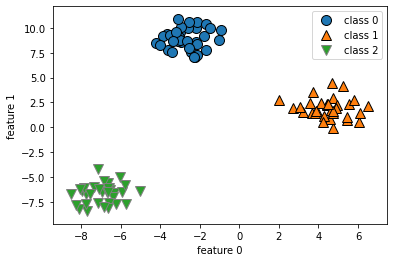

In [60]:
from sklearn.datasets import make_blobs

X, y = make_blobs(random_state=42)

mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.xlabel('feature 0')
plt.ylabel('feature 1')
plt.legend(['class 0', 'class 1', 'class 2'])